## Important packages

In [ ]:
#Import important Functions 
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Functions**

In [ ]:
#checking the accuracy of the model 
from sklearn.metrics import accuracy_score
def acc(Test , Predect):
  acc = accuracy_score(Test, Predect)
  return acc * 100

In [ ]:
#ploting Decision Boundaries
import matplotlib.pyplot as plt

def decision_boundaries (trainx ,trainy, model, title):
  plt.figure(figsize = (10, 5))
  plt.scatter(trainx[trainy == 0,0], trainx[trainy == 0,1], c='y', marker='v', label=0)
  plt.scatter(trainx[trainy == 1,0], trainx[trainy == 1,1], c='r', marker='o', label=1)
  plt.scatter(trainx[trainy == 2,0], trainx[trainy == 2,1], c='b', marker='*', label=2)

  x_min, x_max = trainx[:, 0].min() - 0.1, trainx[:, 0].max() + 0.1
  y_min, y_max = trainx[:, 1].min() - 0.1, trainx[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.5)

  plt.title(title)
  plt.xlabel('color_intensity')
  plt.ylabel('proline')
  plt.legend()
  plt.show()

In [ ]:
def training_time (k,f, xtrain, ytrain):
  import time
  start = time.time()
  ff = KNeighborsClassifier(n_neighbors= k)
  X_train_sample = xtrain.sample(frac= f  , random_state=0)
  y_train_sample = ytrain.sample(frac=f  , random_state=0)
  ff.fit(X_train_sample, y_train_sample)
  stop = time.time()
  time = stop - start
  print(f"Training time: {stop - start}s")
  return time

In [ ]:
def prediction_time (k,f, xtrain, ytrain, xtest):
  import time
  
  ff = KNeighborsClassifier(n_neighbors= k)
  X_train_sample = xtrain.sample(frac= f  , random_state=42)
  y_train_sample = ytrain.sample(frac=f  , random_state=42)
  ff.fit(X_train_sample, y_train_sample)
  start = time.time()
  t = ff.predict(xtest)
  stop = time.time()
  time = stop - start
  print(f"Prediction time: {stop - start}s")
  return time

## **na¨ıve Bayesian classifier**

In [ ]:
#Loading the data
from sklearn.datasets import load_wine
data = load_wine()

#convert the data into pandas DataFrame
wine_data= pd.DataFrame(data= np.c_[data['data'], data['target']],
                 columns= data['feature_names'] + ['target'])
wine_data['target'] = wine_data['target'].astype(int)
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#spliting the data into training data and testing data
x=wine_data.drop('target',axis=1)
y=wine_data['target']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2) 

In [ ]:
#applying naive_bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)


#getting classification report of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



**Decision surface**

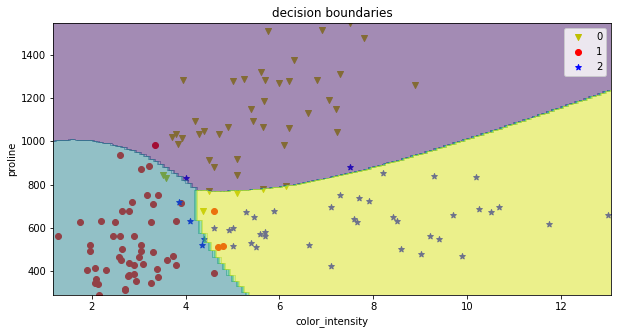

In [ ]:
from sklearn.feature_selection import SelectKBest ,chi2
#using SelectKBest to choose two features
x_new = SelectKBest(chi2, k=2).fit_transform(x,y)
#results shown 'color_intensity' and 'proline'


from sklearn.model_selection import train_test_split
x_trainn,x_testn,y_trainn,y_testn = train_test_split(x_new,y,test_size=0.2,random_state=0) 

from sklearn.naive_bayes import GaussianNB
gnb_new = GaussianNB()
gnb_new.fit(x_trainn, y_trainn)

y_pred_new = gnb_new.predict(x_testn)

decision_boundaries (x_trainn ,y_trainn, gnb_new, 'decision boundaries')

## **KNN classifier**

In [ ]:
#Load the car evaluation dataset
!gdown --id 1zb7NF4eRg0_S48GE3ZhcKDsXvXs7ZkmM

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1zb7NF4eRg0_S48GE3ZhcKDsXvXs7ZkmM
To: /content/car_evaluation.csv
100% 52.0k/52.0k [00:00<00:00, 41.8MB/s]


In [ ]:
car_data= pd.read_csv('/content/car_evaluation.csv')
car_data = car_data.sample(frac=1  , random_state=2).reset_index(drop=True)
car_data.head()

,buying price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,med,low,2,2,med,low,unacc
1,med,med,3,4,big,high,vgood
2,med,low,2,4,big,high,vgood
3,vhigh,high,2,4,big,low,unacc
4,high,low,4,2,small,low,unacc


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_columns = car_data.columns

for feature in data_columns :
  car_data[feature] = le.fit_transform(car_data[feature])

In [ ]:
car_data.head()

,buying price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,2,1,0,0,1,1,2
1,2,2,1,1,0,0,3
2,2,1,0,1,0,0,3
3,3,0,0,1,0,1,2
4,0,1,2,0,2,1,2


In [ ]:
#split the training data into xtrain and ytrain
xtrain = car_data.iloc[:, :-1]
ytrain = car_data.iloc[:,-1]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain ,test_size=428/1728, random_state = 2)
X_train, x_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size =300/1300,random_state = 2)

print('Training set length: {} Row'.format(len(X_train)))
print('Validation set length: {} Row'.format(len(x_cv)))
print('Testing set length: {} Row'.format(len(X_test)))

Training set length: 1000 Row
Validation set length: 300 Row
Testing set length: 428 Row


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 2)

accur  = []
for samples_percentage in np.arange(0.1, 1.1, 0.10) :
  X_train_sample = X_train.sample(frac= samples_percentage  , random_state=2)
  y_train_sample = y_train.sample(frac= samples_percentage  , random_state=2)
  neigh.fit(X_train_sample, y_train_sample)
  validation_predicted = neigh.predict(x_cv)
  testing_predicted = neigh.predict(X_test)
  
  acc_test = acc(y_test , testing_predicted)
  acc_validation = acc(y_cv , validation_predicted)
  accur.append({
      'samples percentage':('{}%'.format(int(samples_percentage *100))),
      'test accuracy' : acc_test , 
      'validation accuracy' : acc_validation 
      })
accuracy =  pd.DataFrame.from_dict(accur) 
print(accuracy)

  samples percentage  test accuracy  validation accuracy
0                10%      57.710280            63.666667
1                20%      63.785047            65.666667
2                30%      66.588785            72.000000
3                40%      70.560748            72.000000
4                50%      72.663551            73.000000
5                60%      74.065421            72.333333
6                70%      72.663551            74.666667
7                80%      72.663551            74.000000
8                90%      76.401869            73.333333
9               100%      77.336449            75.333333


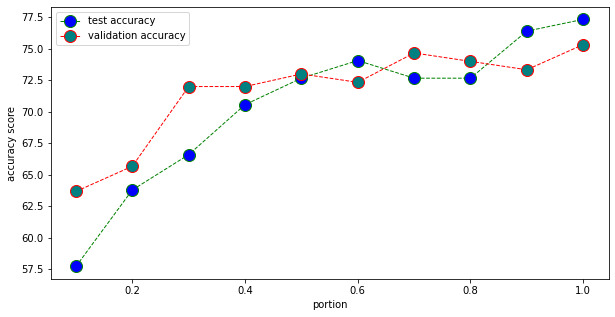

In [ ]:
fig = plt.figure(figsize = (10, 5))
portion = list(np.arange(0.1, 1.1, 0.10))
plt.plot(portion, list(accuracy['test accuracy']), label = "test accuracy", 
         color='green', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='blue', markersize=12)
plt.plot(portion, list(accuracy['validation accuracy']), label = "validation accuracy", 
         color='red', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='teal', markersize=12 )
# plt.title('title')
plt.xlabel('portion')
plt.ylabel('accuracy score')
plt.legend()
plt.show()  

In [ ]:
li  = []
for i in range(1, 11, 1) :
  KNN = KNeighborsClassifier(n_neighbors= i)
  KNN.fit(X_train, y_train)
  t = KNN.predict(X_test)
  v = KNN.predict(x_cv)

  ac_test = acc(t , y_test)
  ac_val = acc(v , y_cv)

  li.append({
      'n_neighbors': i ,
      'test accuracy' : ac_test , 
      'validation accuracy' : ac_val 
      })
K_varies =  pd.DataFrame.from_dict(li).reset_index(drop=True)
K_varies.sort_values(by = ['validation accuracy', 'test accuracy'] , ascending = False)

,n_neighbors,test accuracy,validation accuracy
4,5,91.822430,93.666667
5,6,89.252336,91.333333
6,7,89.485981,90.333333
7,8,87.149533,90.000000
9,10,86.214953,89.333333
8,9,86.448598,88.000000
3,4,88.551402,86.666667
2,3,88.785047,84.333333
0,1,80.607477,75.666667
1,2,76.401869,73.666667


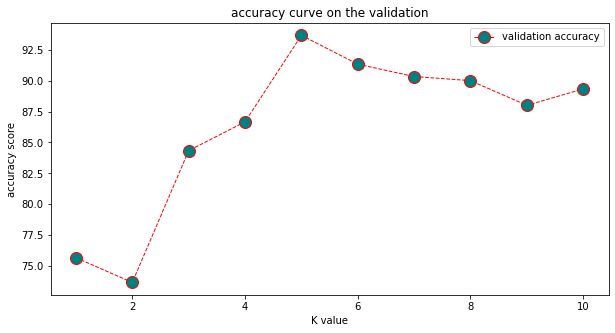

In [ ]:
fig = plt.figure(figsize = (10, 5))
portion = list(np.arange(1, 11, 1))
plt.plot(portion, list(K_varies['validation accuracy']), label = "validation accuracy" ,
         color='red', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='teal', markersize=12 )
plt.title('accuracy curve on the validation')
plt.xlabel('K value')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

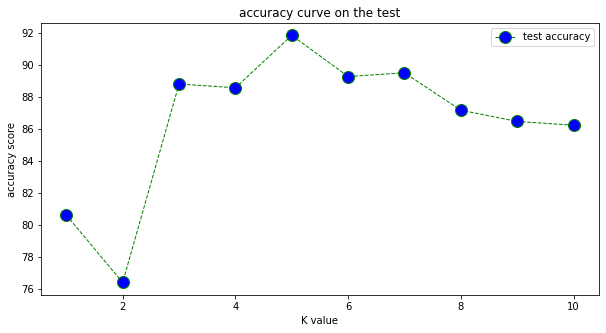

In [ ]:
fig = plt.figure(figsize = (10, 5))
portion = list(np.arange(1, 11, 1))
plt.plot(portion, list(K_varies['test accuracy']), label = "test accuracy" , 
         color='green', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='blue', markersize=12)
plt.title('accuracy curve on the test')
plt.xlabel('K value')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

In [ ]:
#case1 -> 10% of the whole training set and K = 2
case1 = training_time(2 , 0.1 , X_train , y_train)

#case2 -> 100% of the whole training set and K = 2
case2 = training_time(2 , 1 , X_train , y_train)

#case3 -> 10% of the whole training set and K = 10
case3 = training_time(10 , 0.1 , X_train , y_train)

#case4 -> 100% of the whole training set and K = 10
case4 = training_time(10 , 1 , X_train , y_train)

Training time: 0.003393411636352539s
Training time: 0.006621837615966797s
Training time: 0.004071950912475586s
Training time: 0.0063135623931884766s


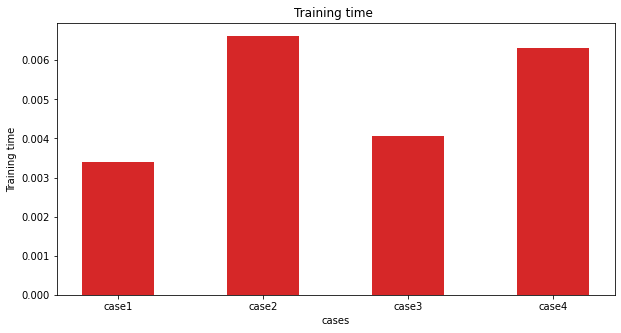

In [ ]:
fig = plt.figure(figsize = (10, 5))
labels = ['case1', 'case2', 'case3', 'case4']
times = [case1,case2,case3,case4]
plt.bar(labels,times, color ='tab:red',width = 0.5)
plt.title('Training time ') 
plt.xlabel('cases')
plt.ylabel('Training time')
plt.show()

In [ ]:
#case1 -> 10% of the whole prediction set and K = 2
case11 = prediction_time(2 , 0.1 , X_train , y_train, X_test)

#case2 -> 100% of the whole prediction set and K = 2
case22 = prediction_time(2 , 1 , X_train , y_train, X_test)

#case3 -> 10% of the whole prediction set and K = 10
case33 = prediction_time(10 , 0.1 , X_train , y_train, X_test)

#case4 -> 100% of the whole prediction set and K = 10
case44 = prediction_time(10 , 1 , X_train , y_train, X_test)

Prediction time: 0.021925926208496094s
Prediction time: 0.014802932739257812s
Prediction time: 0.013156414031982422s
Prediction time: 0.01777172088623047s


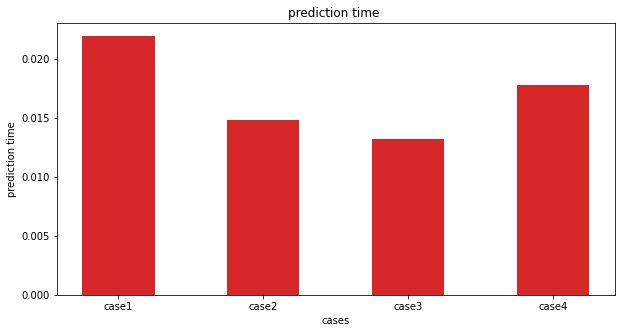

In [ ]:

fig = plt.figure(figsize = (10, 5))
labels = ['case1', 'case2', 'case3', 'case4']
times = [case11,case22,case33,case44]
plt.bar(labels,times, color ='tab:red',width = 0.5)
plt.title('prediction time ')
plt.xlabel('cases')
plt.ylabel('prediction time')
plt.show()